In [5]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## II. Define the grid of modes and redshifts

Let us call the function **define\_grid\_modes\_redshits()**. It returns the bin edges for a fixed grid of modes and redshifts.

- The redshift bins are computed from the frequency according to the formula
\begin{equation}
z_n \equiv \frac{f_{21}}{\frac{f_{21}}{1+z_0} - n B} -1
\end{equation}
where $B$ is the bandwidth and $f_{21}$ is the 21cm frequency.

- The mode bins are computed from the bandwidth according to the formula
\begin{equation}
k_n \equiv {\rm max} \left\{k_{\rm min},  \delta k \right\} + n \delta k \quad {\rm with} \quad \delta k \equiv 2\pi \frac{f_{21}}{B} \frac{H(z_0)}{c(1+z_0)^2}
\end{equation}
This definition corresponds to the bins set by **21cmSense**. Note that the choice of redshift $z_0$ fixes the step of the mode bins.

In [6]:
z_bins, z_centers, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 35, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157
 23.1093637  26.89753031 32.09803559]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


## III. Define the fiducial model and get its power spectrum

A **Fiducial** object can be defined by specifying the path where the lightcones are saved (depends on what was set on the config file) as well as  the redshifts and modes bin edges. Note that we must set by hand whether the mode bins are linearly of logarithmically spaced with the option **logk**  that is by default **False** as the output mode bin deges returned by **define\_grid\_modes\_redshits()** are linearly spaced. Further options can be specified, such as an **observation**  and a fraction of modeling error **frac\_mod** (see below).

In [3]:
files = ['ee_m10MeV_tau1e23s', 'ee_m10MeV_tau1e25s', 'ee_m10MeV_tau1e26s','ee_m10MeV_tau1e27s', 'ee_m10MeV_tau1e28s',
        'ee_m100MeV_tau1e23s', 'ee_m100MeV_tau1e25s', 'ee_m100MeV_tau1e26s', 'ee_m100MeV_tau1e27s', 'ee_m100MeV_tau1e28s',
        'gg_m10MeV_tau1e23s', 'gg_m10MeV_tau1e25s', 'gg_m10MeV_tau1e26s', 'gg_m10MeV_tau1e28s', 
        'gg_m100MeV_tau1e23s', 'gg_m100MeV_tau1e25s', 'gg_m100MeV_tau1e26s', 'gg_m100MeV_tau1e27s', 'gg_m100MeV_tau1e28s', 
        'gg_m10keV_tau1e23s', 'gg_m10keV_tau1e25s', 'gg_m10keV_tau1e26s', 'gg_m10keV_tau1e28s',
        'gg_m100eV_tau1e23s', 'gg_m100eV_tau1e25s', 'gg_m100eV_tau1e26s', 'gg_m100eV_tau1e28s',
        'gg_m40eV_tau1e23s', 'gg_m40eV_tau1e25s', 'gg_m40eV_tau1e26s', 'gg_m40eV_tau1e28s', 
        'LX_39.0', 'LX_39.5', 'LX_40.5', 'LX_41.0', 'LX_41.5', 
        'LX_MINI_39.0', 'LX_MINI_39.5', 'LX_MINI_40.5', 'LX_MINI_41.0', 'LX_MINI_41.5',
        'FIDUCIAL', 'NODM',
        ]

runs = {}

for file in files:
    runs[file] = p21c.Run("../runs/ILLUSTRATION", "Lightcone_rs1993_" + file + ".h5", z_bins, z_centers, k_bins, False, load=True, save=False)

 py21cmcast/core.py:162: z-bins in input are different than the one used to precompute the tables (UserWarning)
 py21cmcast/core.py:170: z-array in input is different than the one used to precompute the tables (UserWarning)


recomputing the tables with the new bins


KeyboardInterrupt: 

In [4]:
%%capture 
## Remove the long 21cmSense output

fiducial = p21c.Fiducial("../runs/ILLUSTRATION", z_bins, z_centers, k_bins, False, load=True, save=False)

fiducial.observation = 'HERA'
fiducial.plot_power_spectrum()

KeyboardInterrupt: 

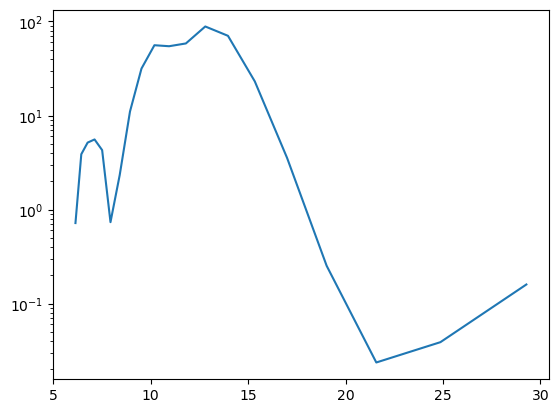

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.gca()

ax.set_yscale('log')
#fiducial = p21c.Fiducial("../runs/ILLUSTRATION", z_bins, z_centers, k_bins, False, load=True, save=False)
ax.plot(fiducial.z_array, [ps[0] for ps in fiducial.power_spectrum])

In [7]:
## Load the data from the files
files = ['FIDUCIAL', 'ee_m10MeV_tau1e23s', 'ee_m10MeV_tau1e25s', 'ee_m10MeV_tau1e26s', 'ee_m10MeV_tau1e28s', 'ee_m10MeV_tau1e28s', 
         'ee_m100MeV_tau1e23s', 'ee_m100MeV_tau1e25s', 'ee_m100MeV_tau1e26s', 'ee_m100MeV_tau1e28s',
         'gg_m10MeV_tau1e23s', 'gg_m10MeV_tau1e25s', 'gg_m10MeV_tau1e26s', 'gg_m10MeV_tau1e28s',
         'gg_m100MeV_tau1e23s', 'gg_m100MeV_tau1e25s', 'gg_m100MeV_tau1e26s', 'gg_m100MeV_tau1e28s',
        'gg_m10keV_tau1e23s', 'gg_m10keV_tau1e25s', 'gg_m10keV_tau1e26s', 'gg_m10keV_tau1e28s',
        'gg_m100eV_tau1e23s', 'gg_m100eV_tau1e25s', 'gg_m100eV_tau1e26s', 'gg_m100eV_tau1e28s',
        'gg_m40eV_tau1e23s', 'gg_m40eV_tau1e25s', 'gg_m40eV_tau1e26s', 'gg_m40eV_tau1e28s', 
        'LX_39.0', 'LX_39.5', 'LX_40.5', 'LX_41.0', 'LX_41.5', 
        'LX_MINI_39.0', 'LX_MINI_39.5', 'LX_MINI_40.5', 'LX_MINI_41.0', 'LX_MINI_41.5',
        'NODM']

power_spectrum = {}
k_array        = {}
z_array        = {}
global_signal  = {}
xH_box         = {}
x_e_box        = {}
Ts_box         = {}
Tk_box         = {}
z_glob         = {}

# Load the global quantities and power spectra from the files
for file in files: 
    with open("../runs/ILLUSTRATION/cache/Table_Lightcone_rs1993_" + file + ".h5.npz", 'rb') as f: 
        data = np.load(f)
        
        power_spectrum[file]    = data['power_spectrum']
        z_array[file]           = data['z_array']
        k_array[file]           = data['k_array']
        global_signal[file]     = data['global_signal']
        xH_box[file]            = data['xH_box']
        x_e_box[file]           = data['x_e_box']
        Ts_box[file]            = data['Ts_box']
        Tk_box[file]            = data['Tk_box']
        z_glob[file]            = data['z_glob']

# Load the experimental noise from the files
with open("../runs/ILLUSTRATION/cache/Table_exp_noise_HERA.npz", 'rb') as f: 
    data = np.load(f)
    ps_exp_noise      = data['ps_exp_noise']

In [8]:
import matplotlib.pyplot as plt

def prepare_plot(**kwargs) :

    """ 
        Function that plots simple functions of one variable on the same graph

    """
    
    fig = plt.figure(figsize = (5,4))
    ax = fig.gca()

    xlim   = kwargs.get('xlim', None)
    ylim   = kwargs.get('ylim', None)
    xlog   = kwargs.get('xlog', False)
    ylog   = kwargs.get('ylog', False)
    xlabel = kwargs.get('xlabel', r'$x$')
    ylabel = kwargs.get('ylabel', r'$y$')

    ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel('{}'.format(xlabel))
    ax.set_ylabel('{}'.format(ylabel))

    if xlog is True:
        ax.set_xscale('log')
    if ylog is True:
        ax.set_yscale('log')

    return fig, ax

lifetime_key = ['tau1e23s', 'tau1e25s', 'tau1e26s', 'tau1e28s']
linestyle    = [':', '--', '-.', '-']
alpha        = [0.8, 0.6, 0.4, 0.2]

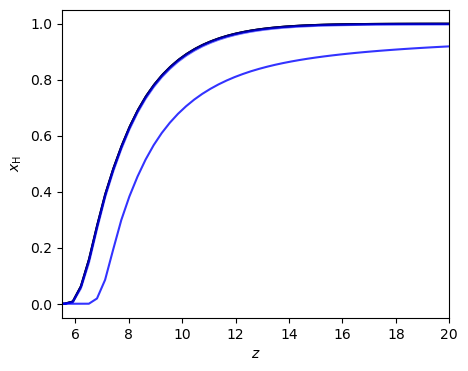

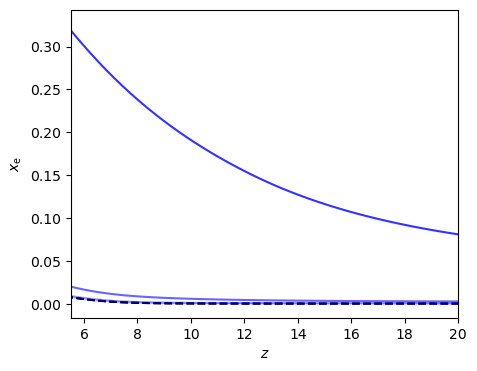

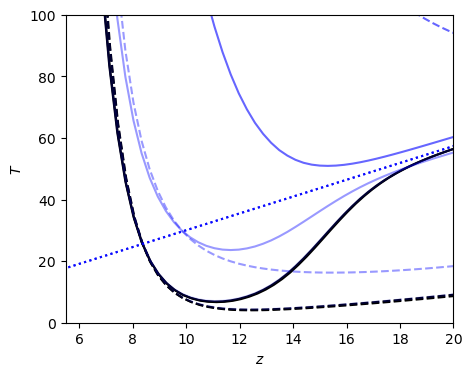

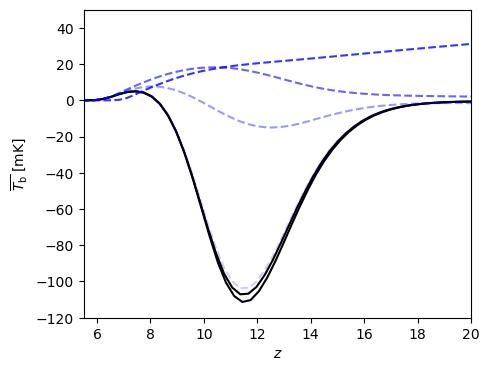

In [9]:
%matplotlib inline

model = 'ee_m10MeV'

fig_xH, ax_xH = prepare_plot(ylog=False, xlim=[5.5, 20], xlabel=r'$z$', ylabel=r'$x_{\rm H}$')
fig_xe, ax_xe = prepare_plot(ylog=False, xlim=[5.5, 20], xlabel=r'$z$', ylabel=r'$x_{\rm e}$')
fig_Ts, ax_Ts = prepare_plot(ylog=False, xlim=[5.5, 20], ylim=[0, 100], xlabel=r'$z$', ylabel=r'$T$')
fig_Tb, ax_Tb = prepare_plot(ylog=False, xlim=[5.5, 20], ylim=[-120, 50], xlabel=r'$z$', ylabel=r'$\overline{T_{\rm b}}~{\rm [mK]}$')

ax_xH.plot(z_glob['FIDUCIAL'], xH_box['FIDUCIAL'], 'k-')
ax_xe.plot(z_glob['FIDUCIAL'], x_e_box['FIDUCIAL'], 'k--')
ax_Ts.plot(z_glob['FIDUCIAL'], Ts_box['FIDUCIAL'], 'k-')
ax_Ts.plot(z_glob['FIDUCIAL'], Tk_box['FIDUCIAL'], 'k--')
ax_Tb.plot(z_glob['FIDUCIAL'], global_signal['FIDUCIAL'], 'k-')


ax_xH.plot(z_glob['NODM'], xH_box['NODM'], 'k-')
ax_xe.plot(z_glob['NODM'], x_e_box['NODM'], 'k--')
ax_Ts.plot(z_glob['NODM'], Ts_box['NODM'], 'k-')
ax_Ts.plot(z_glob['NODM'], Tk_box['NODM'], 'k--')
ax_Tb.plot(z_glob['NODM'], global_signal['NODM'], 'k-')

#ax_Ts.fill_between(z_glob['FIDUCIAL'], 0, 3*Tk_box['FIDUCIAL'], color='k', alpha=0.1)

for i, lifetime in enumerate(lifetime_key):
    ax_xH.plot(z_glob[model + '_' + lifetime], xH_box[model + '_' + lifetime], 'b', alpha=alpha[i])
    ax_xe.plot(z_glob[model + '_' + lifetime], x_e_box[model + '_' + lifetime], 'b', alpha=alpha[i])
    ax_Ts.plot(z_glob[model + '_' + lifetime], Ts_box[model + '_' + lifetime], 'b', alpha=alpha[i])
    ax_Ts.plot(z_glob[model + '_' + lifetime], Tk_box[model + '_' + lifetime], 'b--', alpha=alpha[i])
    ax_Ts.plot(z_glob[model + '_' + lifetime], 2.73*(1+z_glob[model + '_' + lifetime]), 'b:', alpha=alpha[i])
    ax_Tb.plot(z_glob[model + '_' + lifetime], global_signal[model + '_' + lifetime], 'b--', alpha=alpha[i])

Plot for k=0.1799413856461467 Mpc^{-1}


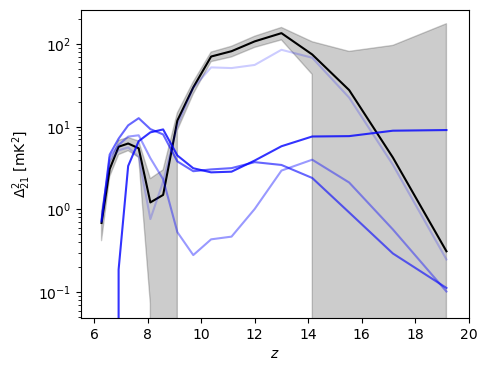

In [11]:
fig_ps, ax_ps = prepare_plot(ylog=True, xlim=[5.5, 20], xlabel=r'$z$', ylabel=r'$\Delta_{21}^2 ~{\rm [mK^2]}$', title=r'$\chi to e^+e^-$')

ps_k1_fid    = np.array([ps[1] for ps in power_spectrum['FIDUCIAL']])
noise_k1_fid = np.array([noise[1] for noise in ps_exp_noise])

print('Plot for k=' + str(k_array['FIDUCIAL'][1]) + ' Mpc^{-1}')

ax_ps.plot(z_array['FIDUCIAL'], ps_k1_fid, 'k-')
ax_ps.fill_between(z_array['FIDUCIAL'],  ps_k1_fid - 2*noise_k1_fid, ps_k1_fid + 2*noise_k1_fid, color='k', alpha=0.2)



for i, lifetime in enumerate(lifetime_key):
    ax_ps.plot(z_array[model + '_' + lifetime], [ps[0] for ps in power_spectrum[model + '_' + lifetime]], 'b', alpha=alpha[i])

Plot for k=0.1799413856461467 Mpc^{-1}


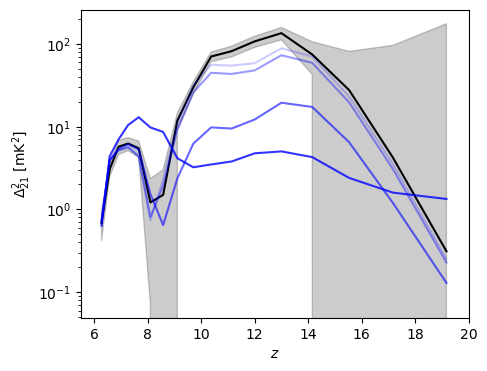

In [12]:
model = 'gg_m10MeV'

fig_ps, ax_ps = prepare_plot(ylog=True, xlim=[5.5, 20], xlabel=r'$z$', ylabel=r'$\Delta_{21}^2 ~{\rm [mK^2]}$')

ps_k1_fid    = np.array([ps[1] for ps in power_spectrum['FIDUCIAL']])
noise_k1_fid = np.array([noise[1] for noise in ps_exp_noise])

print('Plot for k=' + str(k_array['FIDUCIAL'][1]) + ' Mpc^{-1}')

ax_ps.plot(z_array['FIDUCIAL'], ps_k1_fid, 'k-')
ax_ps.fill_between(z_array['FIDUCIAL'],  ps_k1_fid - 2*noise_k1_fid, ps_k1_fid + 2*noise_k1_fid, color='k', alpha=0.2)

for i, lifetime in enumerate(lifetime_key):
    ax_ps.plot(z_array[model + '_' + lifetime], [ps[0] for ps in power_spectrum[model + '_' + lifetime]], 'b', alpha=alpha[i])

Plot for k=0.1799413856461467 Mpc^{-1}


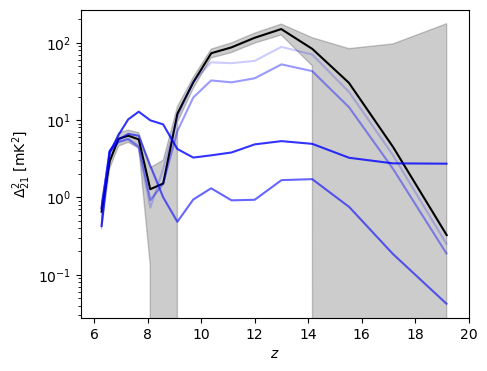

In [67]:
model = 'gg_m100MeV'

fig_ps, ax_ps = prepare_plot(ylog=True, xlim=[5.5, 20], xlabel=r'$z$', ylabel=r'$\Delta_{21}^2 ~{\rm [mK^2]}$')

ps_k1_fid    = np.array([ps[1] for ps in power_spectrum['FIDUCIAL']])
noise_k1_fid = np.array([noise[1] for noise in ps_exp_noise])

print('Plot for k=' + str(k_array['FIDUCIAL'][1]) + ' Mpc^{-1}')

ax_ps.plot(z_array['FIDUCIAL'], ps_k1_fid, 'k-')
ax_ps.fill_between(z_array['FIDUCIAL'],  ps_k1_fid - 2*noise_k1_fid, ps_k1_fid + 2*noise_k1_fid, color='k', alpha=0.2)

for i, lifetime in enumerate(lifetime_key):
    ax_ps.plot(z_array[model + '_' + lifetime], [ps[0] for ps in power_spectrum[model + '_' + lifetime]], 'b', alpha=alpha[i])

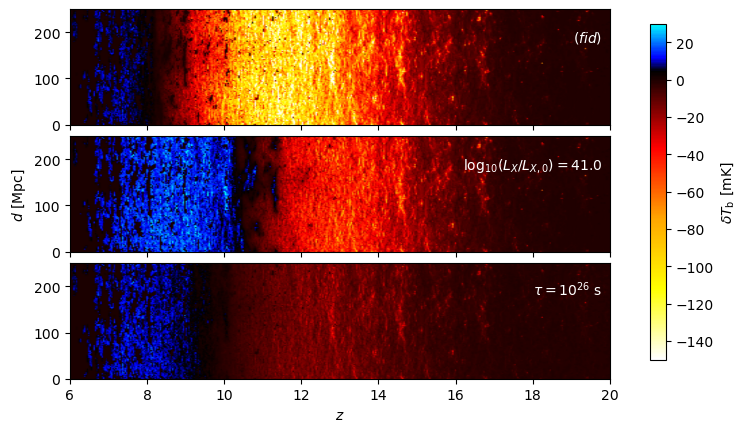

In [8]:
import py21cmfast as p21f
import matplotlib.pyplot as plt
import matplotlib.colors as col
import scipy
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(8, 0.8*6))
gs = fig.add_gridspec(3, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)


filenames  = ['Lightcone_rs1993_FIDUCIAL.h5', 'Lightcone_rs1993_LX_41.0.h5', 'Lightcone_rs1993_ee_m10MeV_tau1e26s.h5']
lightcones = [p21f.LightCone.read("../runs/ILLUSTRATION/" + file) for file in filenames]


for il, lightcone in enumerate(lightcones):

    slc_Tb = np.take(lightcone.brightness_temp, 0, axis=0)
    x_Tb = np.linspace(0, lightcone.cell_size * lightcone.shape[0], lightcone.shape[0])
    y_Tb = lightcone.lightcone_redshifts
    z_interp_Tb = np.linspace(6, 20, 400)
    slc_interp_Tb = []

    for slc_item in slc_Tb:
        slc_interp_Tb.append(scipy.interpolate.interp1d(y_Tb, slc_item)(z_interp_Tb).tolist())

    with open('../figures_paper/Figure_' + filenames[il][:-3] + '.npz', 'wb') as file: 
        np.savez(file, z = z_interp_Tb, x = x_Tb, Tb = slc_interp_Tb)

    c = axs[il].pcolormesh(z_interp_Tb, x_Tb, slc_interp_Tb, cmap="EoR", vmin = -150, vmax= 30, shading='gouraud')
    
axs[0].text(19.8, 180, r'$(fid)$', color='w', ha='right')
axs[1].text(19.8, 180, r'$\log_{10}(L_X/L_{X, 0}) = 41.0$', color='w', ha='right')
axs[2].text(19.8, 180, r'$\tau = 10^{26}~{\rm s}$', color='w', ha='right')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
c_bar = fig.colorbar(c, cax=cbar_ax)
c_bar.set_label(r"$\delta T_{\rm b}~{\rm [mK]}$")

axs[2].set_xlabel(r'$z$')
axs[1].set_ylabel(r'$d~{\rm [Mpc]}$')

fig.savefig("../figures_paper/Lightcones.pdf", bbox_inches='tight')


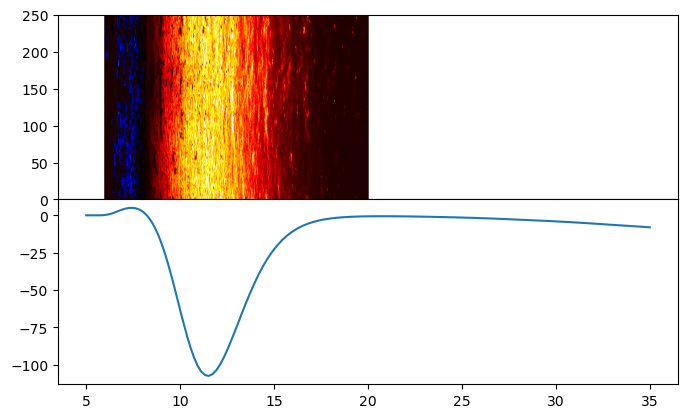

In [8]:
import py21cmfast as p21f
import matplotlib.pyplot as plt
import matplotlib.colors as col
import scipy
import numpy as np

%matplotlib inline


lightcone = p21f.LightCone.read("../runs/ILLUSTRATION/Lightcone_rs1993_FIDUCIAL.h5")


fig = plt.figure(figsize=(8, 0.8*6))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

slc_Tb = np.take(lightcone.brightness_temp, 0, axis=0)
x_Tb = np.linspace(0, lightcone.cell_size * lightcone.shape[0], lightcone.shape[0])
y_Tb = lightcone.lightcone_redshifts
z_interp_Tb = np.linspace(6, 20, 400)
slc_interp_Tb = []

for slc_item in slc_Tb:
   slc_interp_Tb.append(scipy.interpolate.interp1d(y_Tb, slc_item)(z_interp_Tb).tolist())

c = axs[0].pcolormesh(z_interp_Tb, x_Tb, slc_interp_Tb, cmap="EoR", vmin = -150, vmax= 30, shading='gouraud')

axs[1].plot(lightcone.node_redshifts, lightcone.global_quantities['brightness_temp'])
